In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [43]:
df = pd.read_csv('GITHUB/fix_joined/metacritic_scrap.csv')

In [44]:
df

,id,title,platform,release_date,genre,publisher,rating,metascore,metascore_review,userscore,userscore_review,is_online
0,161964,WWF No Mercy,Nintendo 64,2000-11-17,Action,THQ,T,89,14,8.5,97,0
1,160856,Ultimate Fighting Championship,PlayStation,2000-11-13,Action,Crave,T,53,6,6.9,19,0
2,160749,Capcom vs. SNK,Dreamcast,2000-11-09,Action,Capcom,T,80,17,8.7,32,0
3,160922,Gundam: Battle Assault,PlayStation,2000-11-06,Action,Bandai,T,61,4,7.3,10,0
4,101153,Tekken Tag Tournament,PlayStation 2,2000-10-25,Action,Namco,T,85,25,8.5,181,0
...,...,...,...,...,...,...,...,...,...,...,...,...
58017,529622,Earth Defense Force 5,PlayStation 4,2018-12-11,Third-Person,D3Publisher,T,72,44,7.5,39,1
58018,534152,Sunset Overdrive,PC,2018-11-16,Third-Person,"Microsoft Game Studios, THQ Nordic",M,83,4,7.5,140,1
58019,524955,11-11: Memories Retold,PC,2018-11-08,Third-Person,Bandai Namco Games,T,73,11,6.6,37,1
58020,510717,Strange Brigade,PC,2018-08-28,Third-Person,Rebellion,T,68,21,6.5,53,1


In [46]:
df['id'] = df['id'].astype('object')

In [47]:
df['release_date'] = pd.to_datetime(df['release_date'])

In [48]:
df['is_online'] = df['is_online'].astype('object')

In [49]:
# informasi general
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58022 entries, 0 to 58021
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                58022 non-null  object        
 1   title             58022 non-null  object        
 2   platform          58022 non-null  object        
 3   release_date      58022 non-null  datetime64[ns]
 4   genre             58022 non-null  object        
 5   publisher         57984 non-null  object        
 6   rating            44005 non-null  object        
 7   metascore         58022 non-null  int64         
 8   metascore_review  58022 non-null  int64         
 9   userscore         58022 non-null  float64       
 10  userscore_review  58022 non-null  int64         
 11  is_online         58022 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(7)
memory usage: 5.3+ MB


In [50]:
df.describe()

,metascore,metascore_review,userscore,userscore_review
count,58022.000000,58022.000000,58022.000000,58022.000000
mean,70.159147,18.214746,5.715218,139.677553
std,12.643057,17.030919,2.848520,622.809148
min,8.000000,0.000000,0.000000,0.000000
25%,63.000000,6.000000,4.900000,7.000000
50%,72.000000,12.000000,6.800000,21.000000
75%,79.000000,24.000000,7.700000,71.000000
max,98.000000,134.000000,9.800000,33344.000000


In [51]:
# pembagian jenis kolom
numerik = ["metascore", "metascore_review", "userscore", "userscore_review"]
kategorik = ["platform", "genre", "rating", "is_online"]

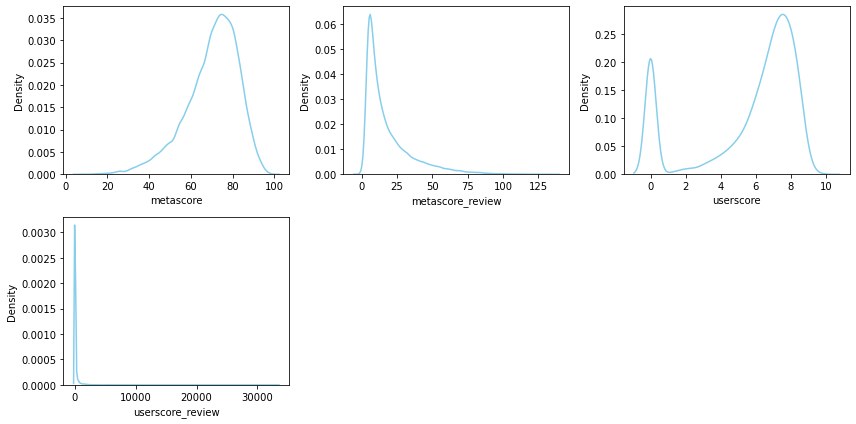

In [52]:
# density plot untuk kolom kolom numerik
plt.figure(figsize=(12,6))

features = numerik
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    sns.kdeplot(x=df[features[i]], color='skyblue')
    plt.xlabel(features[i])
    plt.tight_layout()

In [53]:
df[df['userscore_review'] == 33344]

,id,title,platform,release_date,genre,publisher,rating,metascore,metascore_review,userscore,userscore_review,is_online
41398,212879,Cyberpunk 2077,PC,2020-12-10,Role-Playing,"Warner Bros. Interactive Entertainment, CD Pro...",M,86,92,7.0,33344,1


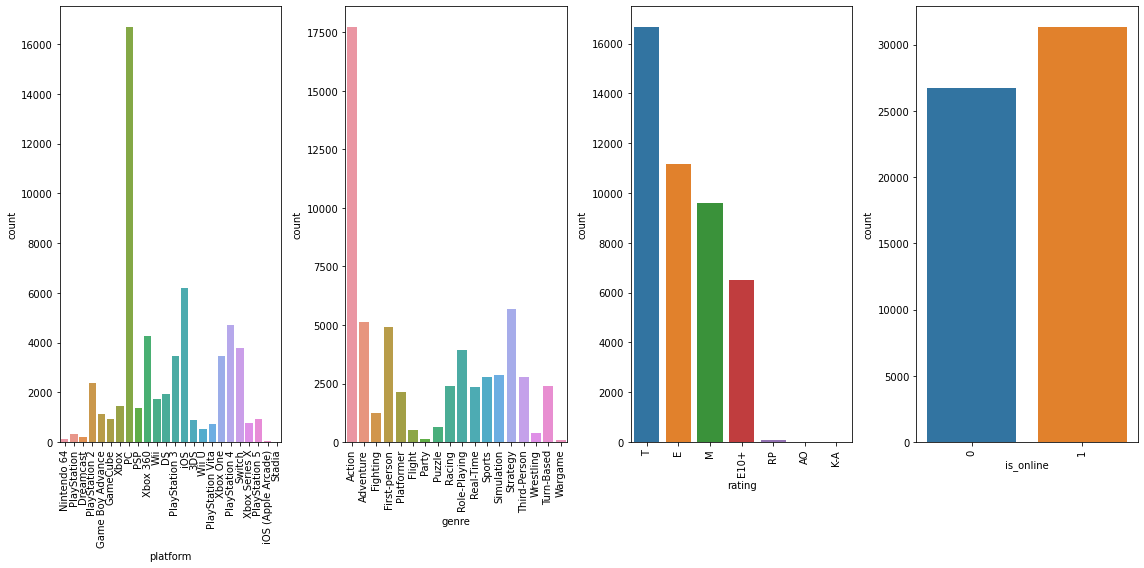

In [54]:
# countplot untuk kolom-kolom kategorik
plt.figure(figsize=(16,8))

features = kategorik
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.countplot(x=df[features[i]])
    plt.xlabel(features[i])
    plt.xticks(rotation=90)
    plt.tight_layout()

<AxesSubplot:xlabel='is_online', ylabel='count'>

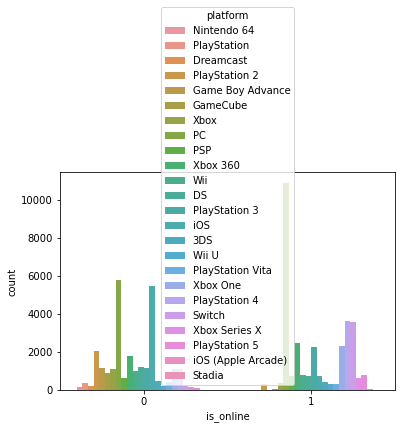

In [41]:
# countplot with hue
# evaluasi hubungan variabel research_experience dengan admit_status
data = df['is_online'].
sns.countplot(data=df, x='is_online', hue='platform')

<AxesSubplot:>

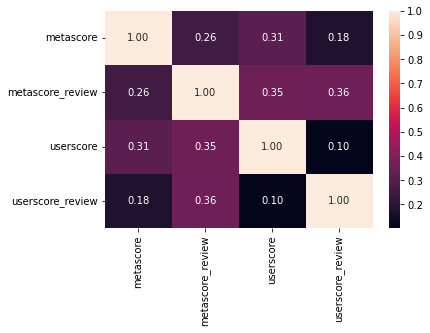

In [42]:
# correlation heatmap
correlation = df.corr()
sns.heatmap(correlation, annot=True, fmt=".2f")